In [1]:
import json
import os

import scipy.io 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('crx.data', na_values='?')
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


# 1. Zidentyfikuj w zbiorze Credit approval dataset cechy (tj. kolumny), dla których brakuje podanych wartości. Uzupełnij brakujące wartości

In [3]:
M = [0 for i in range(16)]
i = 0
for attr in data:
    for v in data[attr]:
        if pd.isna(v):
            M[i] += 1
    i += 1
print(M)

[12, 12, 0, 6, 6, 9, 9, 0, 0, 0, 0, 0, 0, 13, 0, 0]


### brakujące atrybuty stanowią maksywalnie 2% dla danej cechy więc niema sensu usuwanie żadnej cechy

In [4]:
M = [0 for i in range(690)]
i = 0
for attr in data:
    for v in data[attr]:
        if pd.isna(v):
            M[i] += 1
        i += 1
    i = 0
print(max(M))

5


### maksymalna liczba brakujących atrybutów dla przykładów wynosi 5 tj. około 33% wszystkich atrybutów, nie jest to wystarszające aby odrzucić te przykłady

In [5]:
count_a = data['A1'].value_counts()['a']
print(count_a)
count_b = data['A1'].value_counts()['b']
print(count_b)

210
468


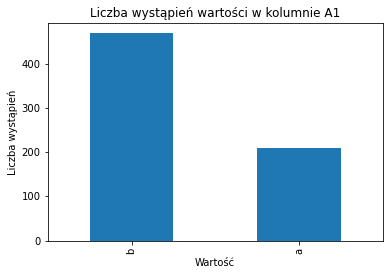

In [6]:
# Wygenerowanie wykresu
data['A1'].value_counts().plot(kind='bar')

# Dodanie tytułu i opisu osi
plt.title('Liczba wystąpień wartości w kolumnie A1')
plt.xlabel('Wartość')
plt.ylabel('Liczba wystąpień')

# Wyświetlenie wykresu
plt.show()

### Zmienna "b" występuje w około 70% przypadków, nie jest to wystarczająco aby uzasadnić wypełnianie brakujących wartości wartością "b" więc najlepiej będzie wypełnić brakujące wartości wartościami losowymi

In [7]:
available_values = ['a', 'b']

# Zastąpienie brakujących wartości losowym wyborem z dostępnych wartości
missing_values_index = data[data['A1'].isnull()].index

# Iteracja po indeksach brakujących wartości i zastąpienie ich losowym wyborem
for index in missing_values_index:
    data.at[index, 'A1'] = np.random.choice(available_values)

In [8]:
count_a = data['A1'].value_counts()['a']
print(count_a)
count_b = data['A1'].value_counts()['b']
print(count_b)

216
474


In [9]:
print(data["A2"].min())
print(data["A2"].max())

13.75
80.25


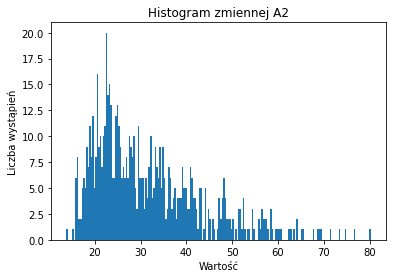

In [10]:
# Wygenerowanie histogramu
plt.hist(data['A2'], bins=200)

# Dodanie tytułu i opisów osi
plt.title('Histogram zmiennej A2')
plt.xlabel('Wartość')
plt.ylabel('Liczba wystąpień')

# Wyświetlenie histogramu
plt.show()

### Niema znaczącą odstających wartości skrajnych więc wystarczy zastąpić brakujące wartości wartością średnią

In [11]:
mean_A1 = data["A2"].mean()
data['A2'].fillna(mean_A1, inplace=True)

In [12]:
count_u = data['A4'].value_counts()['u']
print(count_u)
count_y = data['A4'].value_counts()['y']
print(count_y)
count_l = data['A4'].value_counts()['l']
print(count_l)

# Niema wartości "t" i funkcja pokazuje błąd
# count_t = data['A4'].value_counts()['t']
# print(count_t)

519
163
2


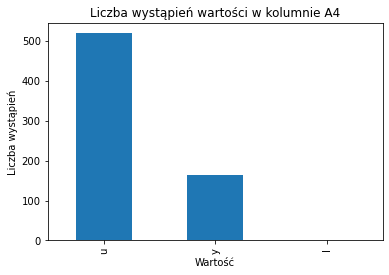

In [13]:
# Wygenerowanie wykresu
data['A4'].value_counts().plot(kind='bar')

# Dodanie tytułu i opisu osi
plt.title('Liczba wystąpień wartości w kolumnie A4')
plt.xlabel('Wartość')
plt.ylabel('Liczba wystąpień')

# Wyświetlenie wykresu
plt.show()

### Przez to że liczba wystąpień wartości "u" jest znacząco większa od wystąpień innych wartości naljepiej będzie zastąpić brakującewartości w tej kolumnie wartością "u"

In [14]:
# Zamiana brakujących wartości na "u"
data['A4'].fillna('u', inplace=True)

In [15]:
count_g = data['A5'].value_counts()['g']
print(count_g)
count_p = data['A5'].value_counts()['p']
print(count_p)
count_gg = data['A5'].value_counts()['gg']
print(count_gg)

519
163
2


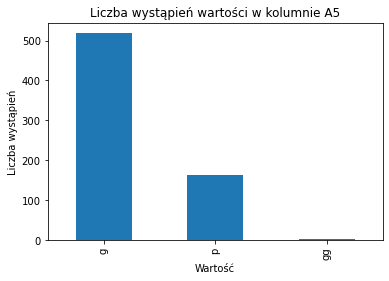

In [16]:
# Wygenerowanie wykresu
data['A5'].value_counts().plot(kind='bar')

# Dodanie tytułu i opisu osi
plt.title('Liczba wystąpień wartości w kolumnie A5')
plt.xlabel('Wartość')
plt.ylabel('Liczba wystąpień')

# Wyświetlenie wykresu
plt.show()

### Przez to że liczba wystąpień wartości "g" jest znacząco większa od wystąpień innych wartości naljepiej będzie zastąpić brakującewartości w tej kolumnie wartością "g"

In [17]:
# Zamiana brakujących wartości na "g"
data['A5'].fillna('g', inplace=True)

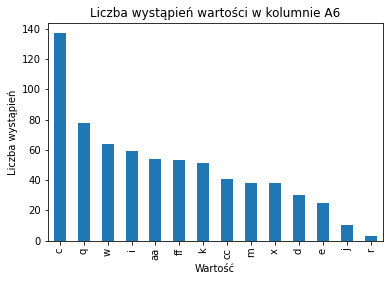

In [18]:
# Wygenerowanie wykresu
data['A6'].value_counts().plot(kind='bar')

# Dodanie tytułu i opisu osi
plt.title('Liczba wystąpień wartości w kolumnie A6')
plt.xlabel('Wartość')
plt.ylabel('Liczba wystąpień')

# Wyświetlenie wykresu
plt.show()

### Najczęściej wystepującą wartością jest "c", występuje ona w około 20% przypadków. W takiej sytuacji nalepiej będzie zastąpićbrakujące wartości wartościami losowymi.

In [19]:
available_values = ['c', 'd', 'cc', 'i', 'j','k','m', 'r', 'q', 'w', 'x', 'e', 'aa', 'ff']

# Zastąpienie brakujących wartości losowym wyborem z dostępnych wartości
missing_values_index = data[data['A6'].isnull()].index

# Iteracja po indeksach brakujących wartości i zastąpienie ich losowym wyborem
for index in missing_values_index:
    data.at[index, 'A6'] = np.random.choice(available_values)

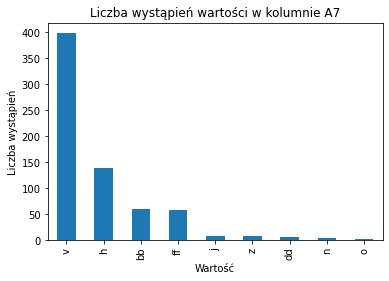

In [20]:
# Wygenerowanie wykresu
data['A7'].value_counts().plot(kind='bar')

# Dodanie tytułu i opisu osi
plt.title('Liczba wystąpień wartości w kolumnie A7')
plt.xlabel('Wartość')
plt.ylabel('Liczba wystąpień')

# Wyświetlenie wykresu
plt.show()

### Przez to że liczba wystąpień wartości "v" jest znacząco większa od wystąpień innych wartości naljepiej będzie zastąpić brakującewartości w tej kolumnie wartością "v"

In [21]:
# Zamiana brakujących wartości na "u"
data['A7'].fillna('v', inplace=True)

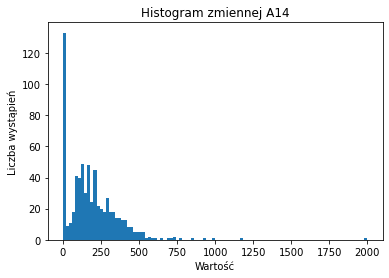

In [22]:
# Wygenerowanie histogramu
plt.hist(data['A14'], bins=100)

# Dodanie tytułu i opisów osi
plt.title('Histogram zmiennej A14')
plt.xlabel('Wartość')
plt.ylabel('Liczba wystąpień')

# Wyświetlenie histogramu
plt.show()

### W tym przypadku mamy do czynienia z pewną liczbą wartości skrajnych które mogą wpłynąć na wartość średnią w taki sposób żemoże to doprowadzić do wyników fałszywie reprezentatywnych dane. A więc w tym przypadku najlepiej jest wziąć mediane do uzupełniania wartości średnich.

In [23]:
# Obliczenie mediany kolumny A14
median_A14 = data['A14'].median()

# Wypełnienie brakujących wartości medianą
data['A14'].fillna(median_A14, inplace=True)

### Pytanie:
### Jak będzie wyglądało uzupełnianie brakujących wartości dla danych numerycznych, a jak dla danych nominalnych?
### Odpowiedź:
### Dla wartości numerycznych najlepiej będzie uzupełniać brakujące wartości średnią lub medianą. Średnią gdy niema znacząco odstających wartości skrajnych a medianą gdy takie wartości występują.
### Dla wartości nominalnych najlepiej będzie uzupełniać brakujące wartości najczęstszą wartością cechy lub wartością losową. Gdy jakaś wartość wystepuje w większości przypadków (np. w ponad 75%) to lepiej zastosować ją a gdy niema takiej wartości to lepiej dać wartość losową.

# 2. Zwizualizuj rozkład wartości każdej cechy oraz zależności od innych cech w tzw. macierzy rozrzutu (ang. scatter matrix ).

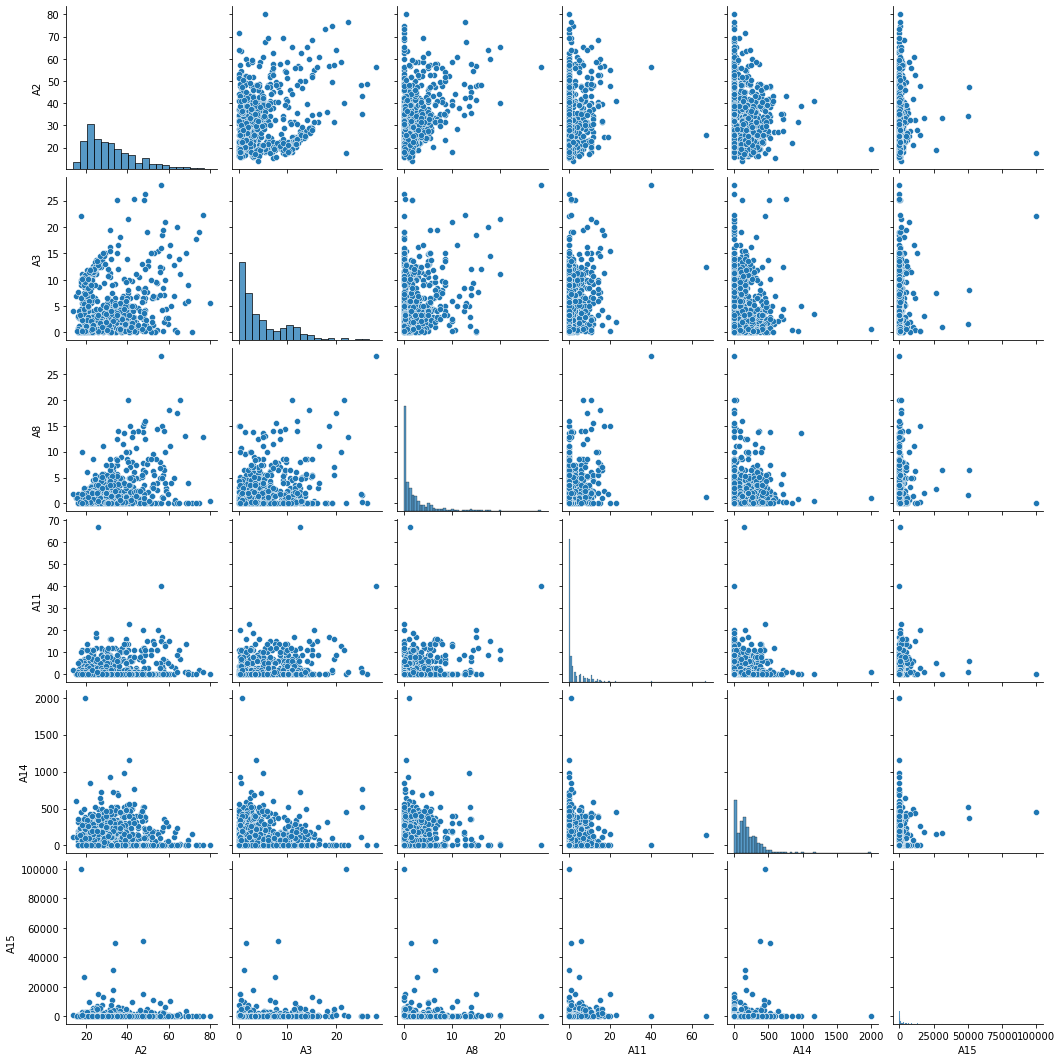

In [24]:
# Wizualizacja macierzy rozrzutu
sns.pairplot(data)
plt.show()

# 3.. Kodowanie wartości nominalnych. Przeanalizuj, jak klasyfikatory radzą sobie z reprezentacją cech w postaci nominalnej oraz w kodowaniu one hot encoding.

In [25]:
# -regresji logistycznej, 
# -naiwnego Bayesa (NB), 
# -najbliższych sąsiadów (klasyfikatora k-NN), 
# -metody wektorów nośnych (Support Vector Machines, SVM) 
# -oraz lasów losowych (ang.random forests) 

### Klasyfikatory nie radziły sobie z wartościami nominalnymi dlatego trzeba było je wszystkie przekształcić do postaci one hot encoding

In [26]:
y = data.pop("A16")
y = y.map({'+': 1, '-': 0})

In [27]:
from sklearn.model_selection import train_test_split

categorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns

X_train = data
y_train = y

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

one_hot_encoder = OneHotEncoder(
    drop="first", sparse=False, handle_unknown="ignore"
)

categorical_pipeline = Pipeline([ ("one_hot_encoder", one_hot_encoder) ])

column_transformer = ColumnTransformer([
    ("categorical_transformer", categorical_pipeline, categorical_features),
    ("numerical_transformer", SimpleImputer(strategy='mean'), numerical_features)
], verbose_feature_names_out=False)

# fit and transform
X_train = column_transformer.fit_transform(X_train)
# X_test  = column_transformer.transform(X_test)

### dokładność = Liczba poprawnie sklasyfikowanych obserwacji / Liczba wszystkich obserwacji

In [29]:
results = []

### regresja logistyczna

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression(fit_intercept=False)

# Perform cross-validation
scores = cross_val_score(logistic_reg, X_train, y_train, cv=5)

# Compute mean accuracy
mean_accuracy = scores.mean()

# Compute confidence interval
confidence_interval = (scores.mean() - 2 * scores.std(), scores.mean() + 2 * scores.std())

print(f"Mean accuracy: {mean_accuracy:.4f}")
print(f"Confidence interval: {confidence_interval}")

results.append(["regresja logistyczna",mean_accuracy,confidence_interval,"nie"])

Mean accuracy: 0.8377
Confidence interval: (0.6208509656896807, 1.054511353150899)


C:\Users\pawel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pawel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

### naiwny Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

gnb = GaussianNB()

# Perform cross-validation
scores = cross_val_score(gnb, X_train, y_train, cv=5)

# Compute mean accuracy
mean_accuracy = scores.mean()

# Compute confidence interval
confidence_interval = (scores.mean() - 2 * scores.std(), scores.mean() + 2 * scores.std())

print(f"Mean accuracy: {mean_accuracy:.4f}")
print(f"Confidence interval: {confidence_interval}")

results.append(["naiwny Bayes",mean_accuracy,confidence_interval,"nie"])

Mean accuracy: 0.8072
Confidence interval: (0.7130546271926266, 0.901438126430562)


### klasyfikatora k-NN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

neigh = KNeighborsClassifier(n_neighbors=3)

# Perform cross-validation
scores = cross_val_score(neigh, X_train, y_train, cv=5)

# Compute mean accuracy
mean_accuracy = scores.mean()

# Compute confidence interval
confidence_interval = (scores.mean() - 2 * scores.std(), scores.mean() + 2 * scores.std())

print(f"Mean accuracy: {mean_accuracy:.4f}")
print(f"Confidence interval: {confidence_interval}")

results.append(["klasyfikatora k-NN",mean_accuracy,confidence_interval,"nie"])

Mean accuracy: 0.6493
Confidence interval: (0.5773352252406327, 0.7212154993970485)


### Metoda wektorów nośnych

In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Inicjalizacja klasyfikatora SVM
svm_clf = SVC(kernel='linear', random_state=0)

# Perform cross-validation
scores = cross_val_score(svm_clf, X_train, y_train, cv=5)

# Obliczenie średniej dokładności
mean_accuracy = scores.mean()

# Obliczenie przedziału ufności
confidence_interval = (scores.mean() - 2 * scores.std(), scores.mean() + 2 * scores.std())

print(f"Mean accuracy: {mean_accuracy:.4f}")
print(f"Confidence interval: {confidence_interval}")

results.append(["Metoda wektorów nośnych",mean_accuracy,confidence_interval,"nie"])

Mean accuracy: 0.8304
Confidence interval: (0.6130241554481256, 1.047845409769266)


### Lasy losowe

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_clf = RandomForestClassifier(n_estimators=500, criterion="entropy", n_jobs=-1, random_state=0)

# Perform cross-validation
scores = cross_val_score(rf_clf, X_train, y_train, cv=5)

# Compute mean accuracy
mean_accuracy = scores.mean()

# Compute confidence interval
confidence_interval = (scores.mean() - 2 * scores.std(), scores.mean() + 2 * scores.std())

print(f"Mean accuracy: {mean_accuracy:.4f}")
print(f"Confidence interval: {confidence_interval}")

results.append(["Lasy losowe",mean_accuracy,confidence_interval,"nie"])

Mean accuracy: 0.8522
Confidence interval: (0.6398464165586965, 1.0645014095282601)


# 4.Przeprowadź skalowanie cech. Najczęściej stosuje się jedno z dwóch podejść. Zbadaj, jak skalowanie cech wpływa na dokładność klasyfikatorów k-NN oraz lasów losowych

In [35]:
from sklearn.model_selection import train_test_split

categorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns

X_train = data
y_train = y

## Do skalowania cech użyto normalizacji (ang. min-max scaling)

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler


one_hot_encoder = OneHotEncoder(
    drop="first", sparse=False, handle_unknown="ignore"
)

standard_scaler = MinMaxScaler()

categorical_pipeline = Pipeline([ ("one_hot_encoder", one_hot_encoder) ])
numerical_pipeline = Pipeline([("min_max_scaler", standard_scaler) ])

column_transformer = ColumnTransformer([
    ("categorical_transformer", categorical_pipeline, categorical_features),
    ("numerical_transformer", numerical_pipeline, numerical_features)
], verbose_feature_names_out=False)

# fit and transform
X_train = column_transformer.fit_transform(X_train)
# X_test  = column_transformer.transform(X_test)

### klasyfikatora k-NN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

neigh = KNeighborsClassifier(n_neighbors=3)

# Perform cross-validation
scores = cross_val_score(neigh, X_train, y_train, cv=5)

# Compute mean accuracy
mean_accuracy = scores.mean()

# Compute confidence interval
confidence_interval = (scores.mean() - 2 * scores.std(), scores.mean() + 2 * scores.std())

print(f"Mean accuracy: {mean_accuracy:.4f}")
print(f"Confidence interval: {confidence_interval}")

results.append(["klasyfikatora k-NN",mean_accuracy,confidence_interval,"min_max_scaler"])

Mean accuracy: 0.8275
Confidence interval: (0.6475924846936956, 1.0074799790744204)


## Odpowiedź:
## Użycie skalowania znaczocą poprawiło dokładność w przypadku klasyfikatora najbliższych sąsiadów

### Lasy losowe

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_clf = RandomForestClassifier(n_estimators=500, criterion="entropy", n_jobs=-1, random_state=0)

# Perform cross-validation
scores = cross_val_score(rf_clf, X_train, y_train, cv=5)

# Compute mean accuracy
mean_accuracy = scores.mean()

# Compute confidence interval
confidence_interval = (scores.mean() - 2 * scores.std(), scores.mean() + 2 * scores.std())

print(f"Mean accuracy: {mean_accuracy:.4f}")
print(f"Confidence interval: {confidence_interval}")

results.append(["Lasy losowe",mean_accuracy,confidence_interval,"min_max_scaler"])

Mean accuracy: 0.8536
Confidence interval: (0.6387781975628241, 1.0684681792487702)


## Odpowiedź:
## Użycie skalowania nie wpłynęło prawie wogóle na dokładność w przypadku lasów losowych

# 5.Porównaj wyniki otrzymane przez klasyfikatory. Wyniki przedstaw jako dokładność razem z przedziałem ufności.
# Ponieważ zbiór danych jest nieduży, pomiary wykonaj przy pomocy 5-krotnej walidacji krzyżowej

In [39]:
results.sort(key=lambda x:x[1],reverse=True)
r = pd.DataFrame(data = results, columns = ['klasyfikator','dokładność','przedział ufności','skalowanie'])
r

,klasyfikator,dokładność,przedział ufności,skalowanie
0,Lasy losowe,0.853623,"(0.6387781975628241, 1.0684681792487702)",min_max_scaler
1,Lasy losowe,0.852174,"(0.6398464165586965, 1.0645014095282601)",nie
2,regresja logistyczna,0.837681,"(0.6208509656896807, 1.054511353150899)",nie
3,Metoda wektorów nośnych,0.830435,"(0.6130241554481256, 1.047845409769266)",nie
4,klasyfikatora k-NN,0.827536,"(0.6475924846936956, 1.0074799790744204)",min_max_scaler
5,naiwny Bayes,0.807246,"(0.7130546271926266, 0.901438126430562)",nie
6,klasyfikatora k-NN,0.649275,"(0.5773352252406327, 0.7212154993970485)",nie


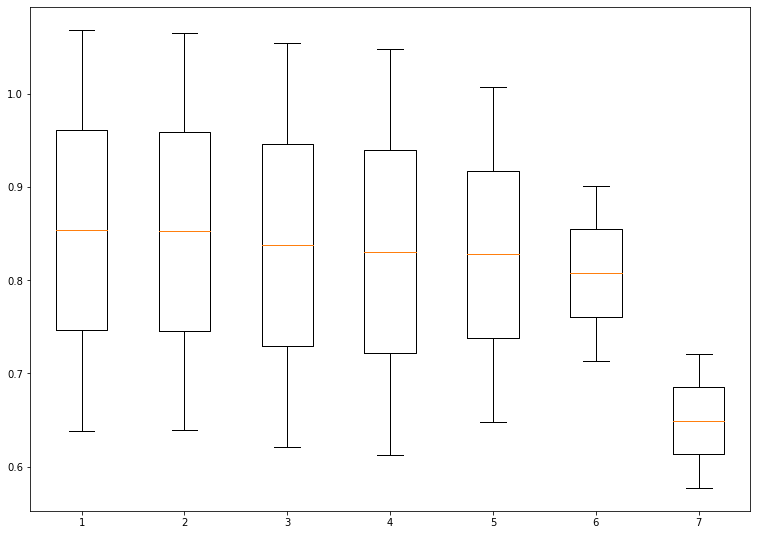

In [40]:
# przedziały ufności
data_1 = results[0][2]
data_2 = results[1][2]
data_3 = results[2][2]
data_4 = results[3][2]
data_5= results[4][2]
data_6 = results[5][2]
data_7 = results[6][2]
d = [data_1, data_2, data_3, data_4, data_5, data_6, data_7]
 
fig = plt.figure(figsize =(10, 7))
 
ax = fig.add_axes([0, 0, 1, 1])
 
bp = ax.boxplot(d)
 
plt.show()

### Analiza:

### Naiwny Bayes ma bardzo zbliżoną dokładność w stosunku do najelepszych z badanych klasyfikatorów. Dodatkowo ma znacznie węższy przedział ufności, oznacza to że jego dokładność jest wyznaczona bardziej precyzyjnie.

# 6.Dla wybranego klasyfikatora przedstaw wykres precyzji w funkcji pełności (ang. precision-recall curve) oraz wykres charakterystyki roboczej odbiornika (ang. receiver operating characteristic, ROC )

## Wybrano klasyfikator regresji logistycznej

In [41]:
from sklearn.model_selection import train_test_split

categorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns

X_train, X_test, y_train, y_test = train_test_split(
    data, y, test_size=0.3, random_state=0
)

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler


one_hot_encoder = OneHotEncoder(
    drop="first", sparse=False, handle_unknown="ignore"
)

standard_scaler = MinMaxScaler()

categorical_pipeline = Pipeline([ ("one_hot_encoder", one_hot_encoder) ])
numerical_pipeline = Pipeline([("min_max_scaler", standard_scaler) ])

column_transformer = ColumnTransformer([
    ("categorical_transformer", categorical_pipeline, categorical_features),
    ("numerical_transformer", numerical_pipeline, numerical_features)
], verbose_feature_names_out=False)

# fit and transform
X_train = column_transformer.fit_transform(X_train)
X_test  = column_transformer.transform(X_test)

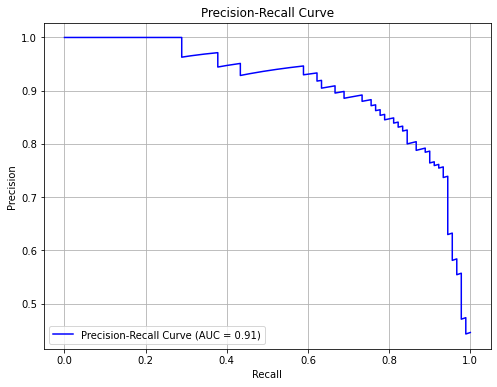

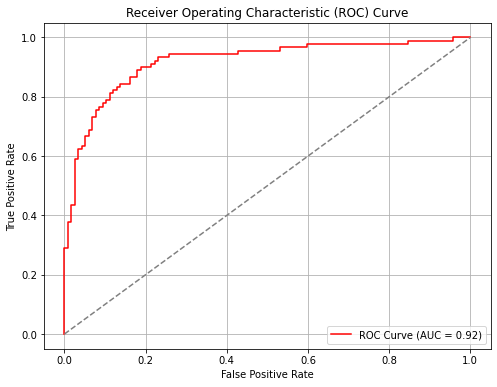

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt

# Inicjalizacja klasyfikatora regresji logistycznej
logistic_reg = LogisticRegression(fit_intercept=False)

# Dopasowanie modelu do danych treningowych
logistic_reg.fit(X_train, y_train)

# Pobranie prawdopodobieństw przewidywanych przez model dla zbioru testowego
y_scores = logistic_reg.decision_function(X_test)

# Obliczenie krzywej precyzji i odbiornika
precision, recall, _ = precision_recall_curve(y_test, y_scores)
fpr, tpr, _ = roc_curve(y_test, y_scores)

# Obliczenie obszaru pod krzywą (AUC)
pr_auc = auc(recall, precision)
roc_auc = auc(fpr, tpr)

# Wykres precyzji w funkcji pełności
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

# Wykres charakterystyki roboczej odbiornika (ROC)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### AUC na poziomie 0.91 wskazuje na bardzo dobrą zdolność modelu do rozróżniania między klasami.